In [1]:
#import libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from datetime import datetime


#For Preporcession and cleaning step
from sklearn.preprocessing import MinMaxScaler

#For training setp
from sklearn.model_selection import train_test_split
import tensorflow.keras
from keras.models import Sequential
from keras.layers import Dense

#For Evaluation
from sklearn.metrics import accuracy_score

In [2]:
## load data
dateparse=lambda x:datetime.strptime(x, '%m/%d/%Y')
df=pd.read_csv('Gold.csv',parse_dates=['Date'],date_parser=dateparse)

In [3]:
df.head()

,Date,Close/Last,Volume,Open,High,Low
0,2022-10-28,1648.3,186519.0,1667.2,1670.9,1640.7
1,2022-10-27,1668.8,180599.0,1668.8,1674.8,1658.5
2,2022-10-26,1669.2,183453.0,1657.7,1679.4,1653.8
3,2022-10-25,1658.0,178706.0,1654.5,1666.8,1641.2
4,2022-10-24,1654.1,167448.0,1662.9,1675.5,1648.0


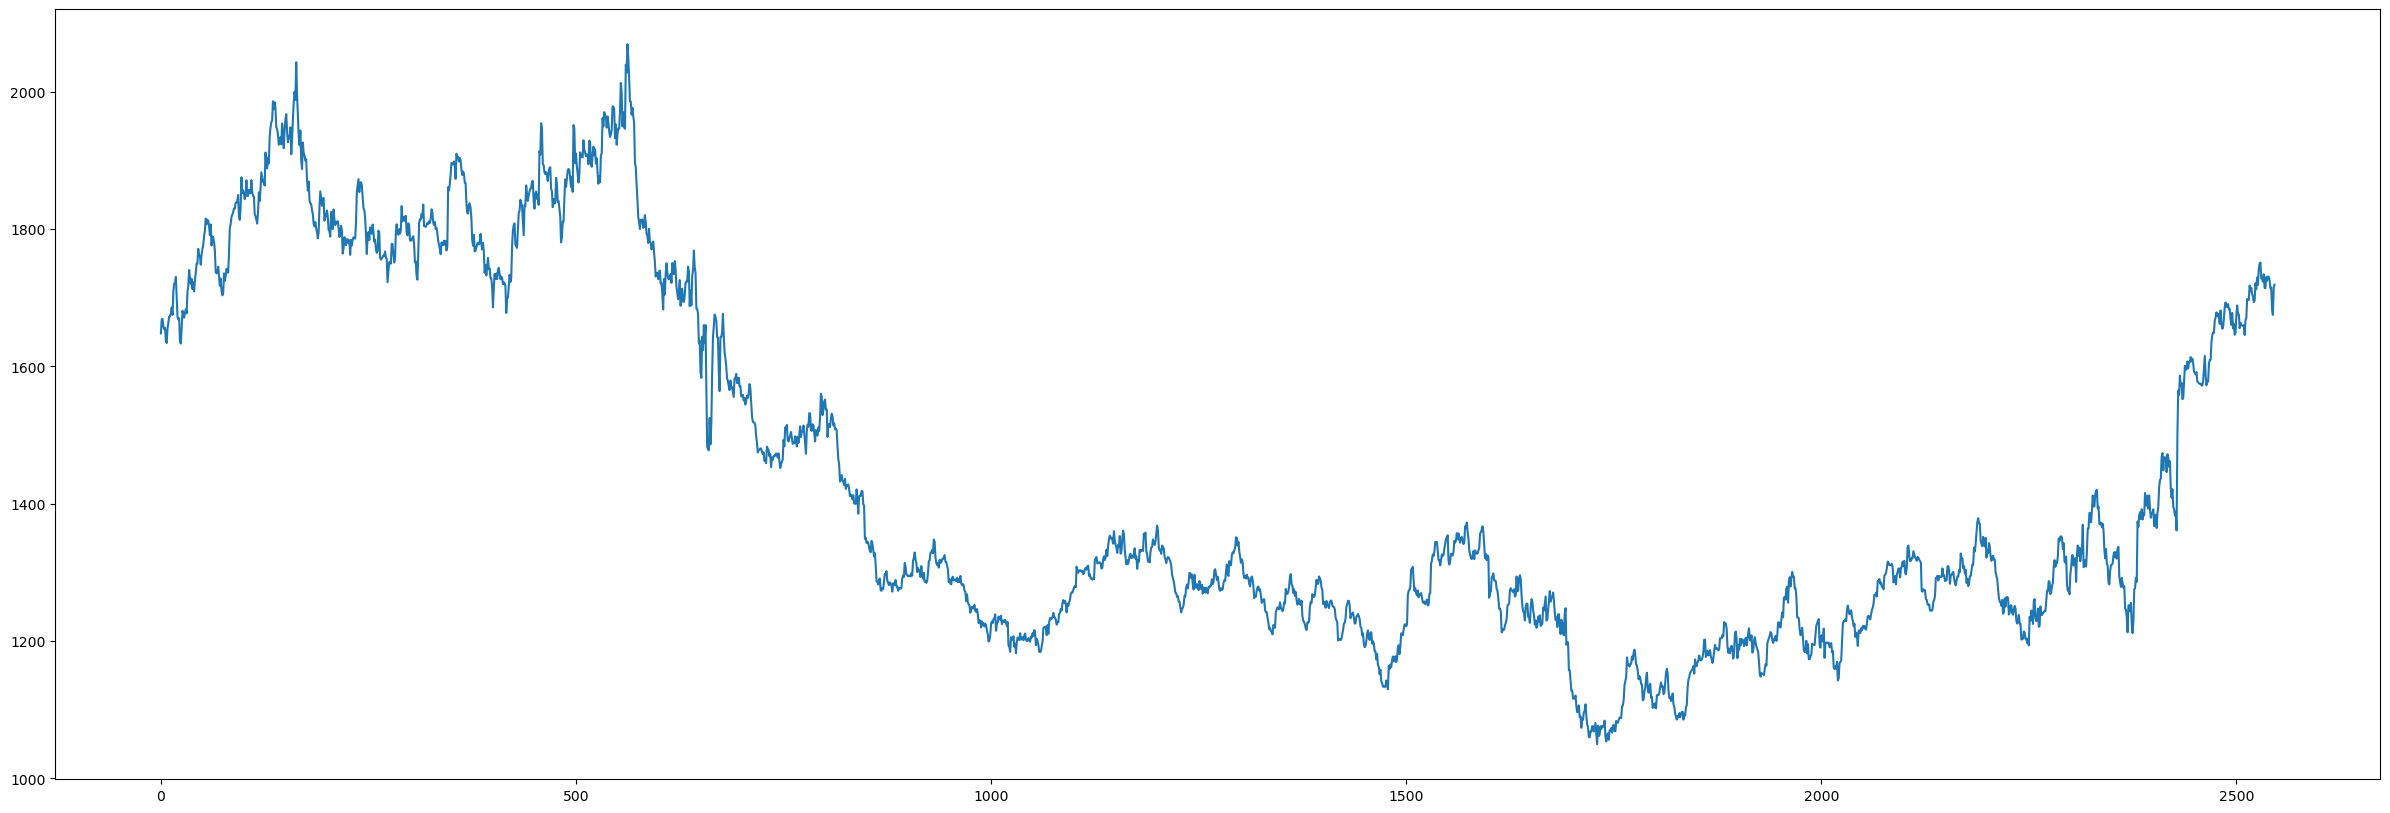

In [6]:
v_df=df[['Close/Last']]
plt.figure(figsize=(30,10))
plt.plot(v_df)

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2547 entries, 0 to 2546
Data columns (total 6 columns):
 #   Column      Non-Null Count  Dtype         
---  ------      --------------  -----         
 0   Date        2547 non-null   datetime64[ns]
 1   Close/Last  2547 non-null   float64       
 2   Volume      2508 non-null   float64       
 3   Open        2547 non-null   float64       
 4   High        2547 non-null   float64       
 5   Low         2547 non-null   float64       
dtypes: datetime64[ns](1), float64(5)
memory usage: 119.5 KB


In [9]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
Close/Last,2547.0,1437.557008,255.898467,1049.6,1243.45,1318.5,1698.10,2069.4
Volume,2508.0,182067.668660,97589.342619,1.0,120901.00,168425.5,231754.00,787217.0
Open,2547.0,1437.743031,256.239938,1051.5,1243.00,1319.0,1701.45,2076.4
High,2547.0,1447.083235,257.924158,1062.7,1251.00,1326.3,1715.30,2082.1
Low,2547.0,1427.891991,253.641116,1045.4,1235.25,1310.9,1684.00,2049.0


In [10]:
df.shape

(2547, 6)

In [11]:
df.isna().any().any()

True

In [12]:
# drop the row which contain the missing Value
df.dropna(inplace=True)
df.reset_index(drop=True,inplace=True)


In [13]:
df.shape

(2508, 6)

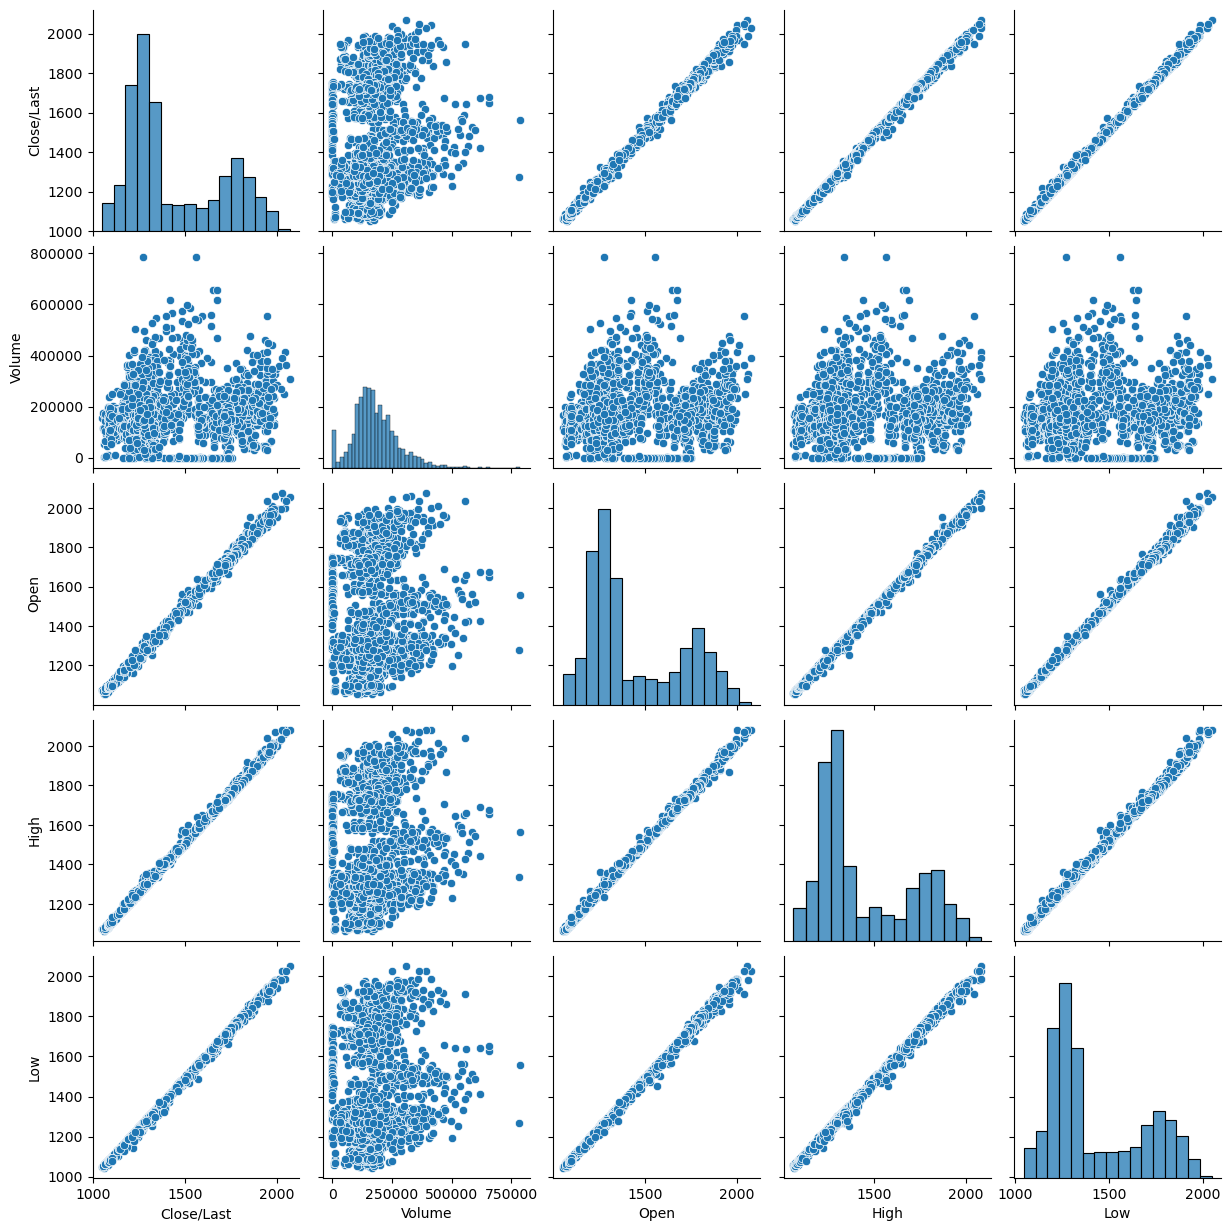

In [14]:
#data visualization
sns.pairplot(df)

C:\Users\hp\AppData\Local\Temp\ipykernel_22824\58359773.py:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(df.corr())


<Axes: >

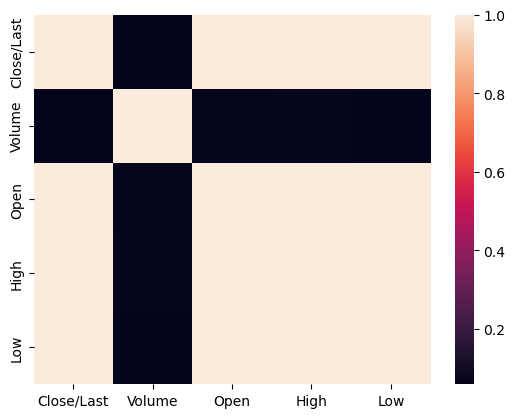

In [15]:
sns.heatmap(df.corr())

In [16]:
##Feature Engineering and Selection
features=['Open','High','Low']
label=['Close/Last']

In [17]:
X_df=df[features]
y_df=df[label]

In [18]:
scaler=MinMaxScaler()
X_df_scaled=scaler.fit_transform(X_df)
y_df_scaled=scaler.fit_transform(y_df)

In [19]:
X_df_scaled

array([[0.60074154, 0.59662547, 0.59316461],
       [0.60230266, 0.60045125, 0.61090076],
       [0.59147234, 0.6049637 , 0.60621762],
       ...,
       [0.64796566, 0.64204434, 0.62714229],
       [0.65264904, 0.65214832, 0.66729773],
       [0.64279442, 0.65126545, 0.66201674]])

In [20]:
y_df_scaled

array([[0.5870759 ],
       [0.60717788],
       [0.60757011],
       ...,
       [0.61345362],
       [0.65297117],
       [0.65650127]])

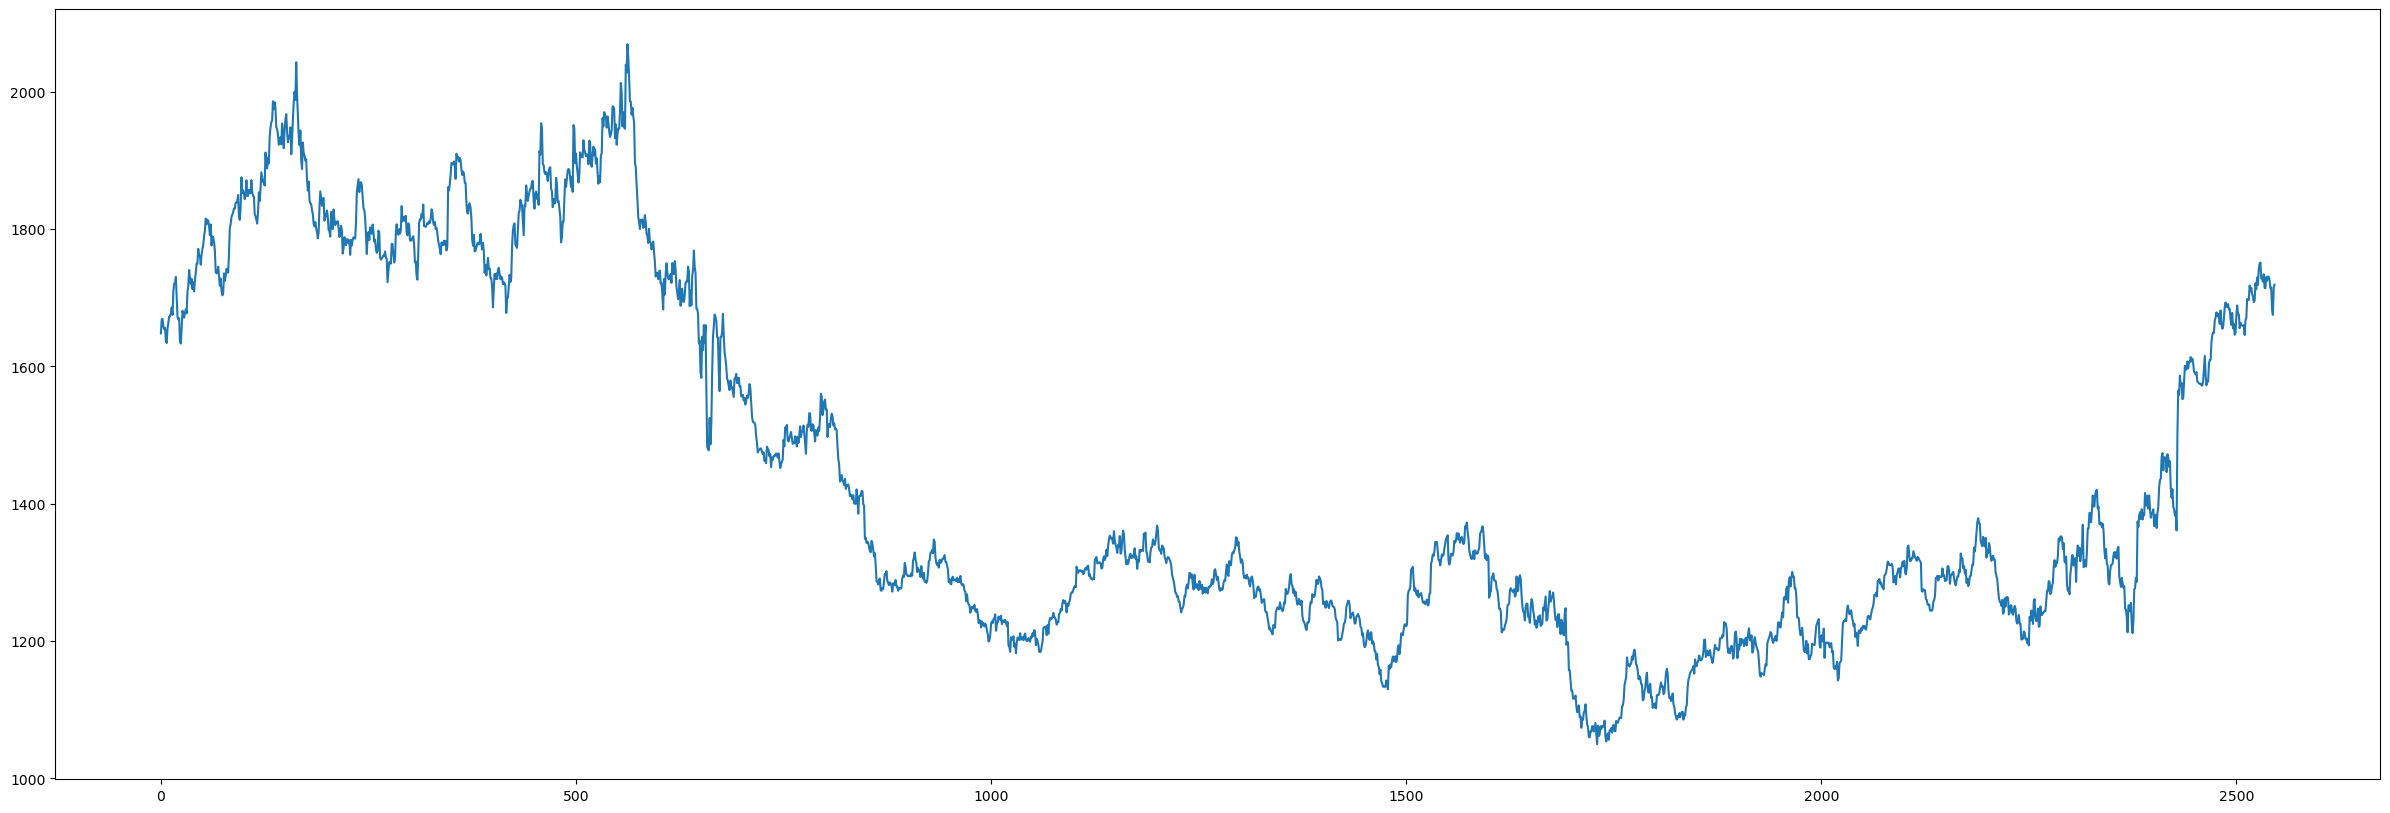

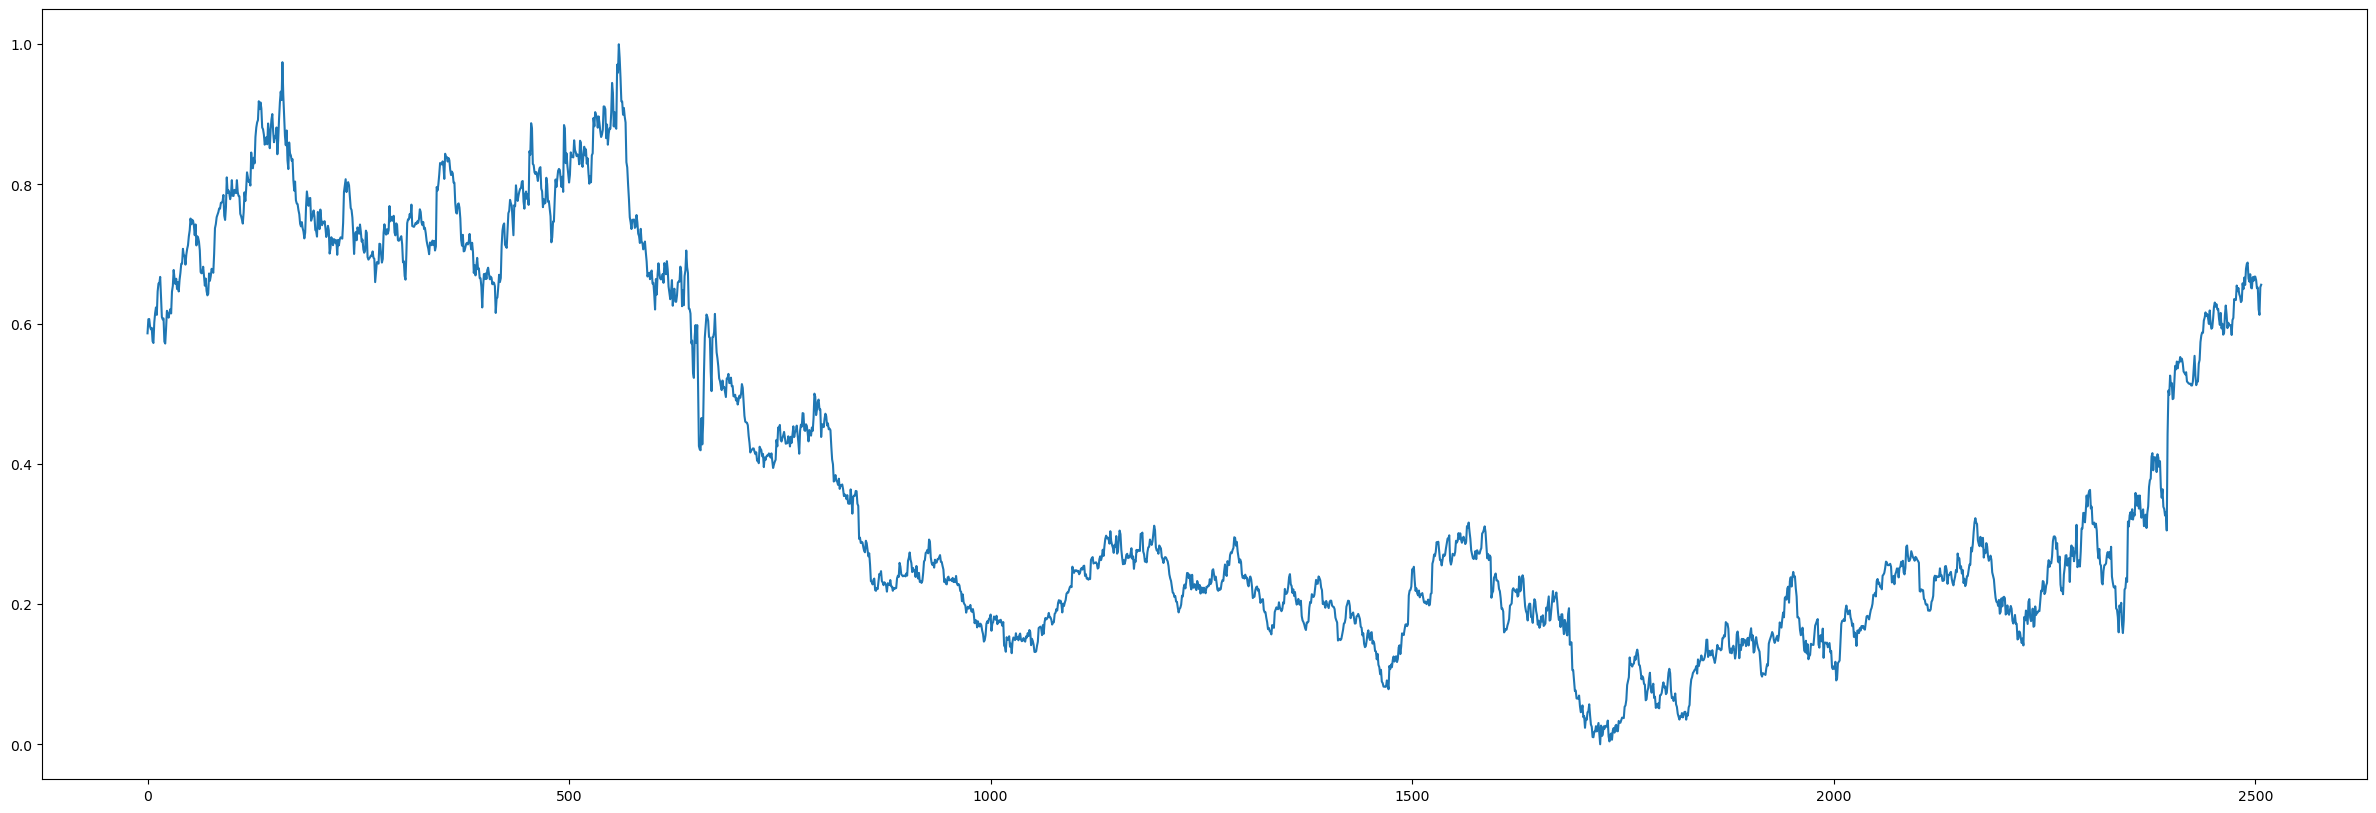

In [22]:
plt.figure(figsize=(30,10))
plt.plot(v_df)
plt.figure(figsize=(30,10))
plt.plot(y_df_scaled)

In [23]:
##Model Creation and Training
X_train,X_test,y_train,y_test=train_test_split(X_df_scaled,y_df_scaled,shuffle=False,test_size=0.2)

In [24]:
print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

(2006, 3)
(502, 3)
(2006, 1)
(502, 1)


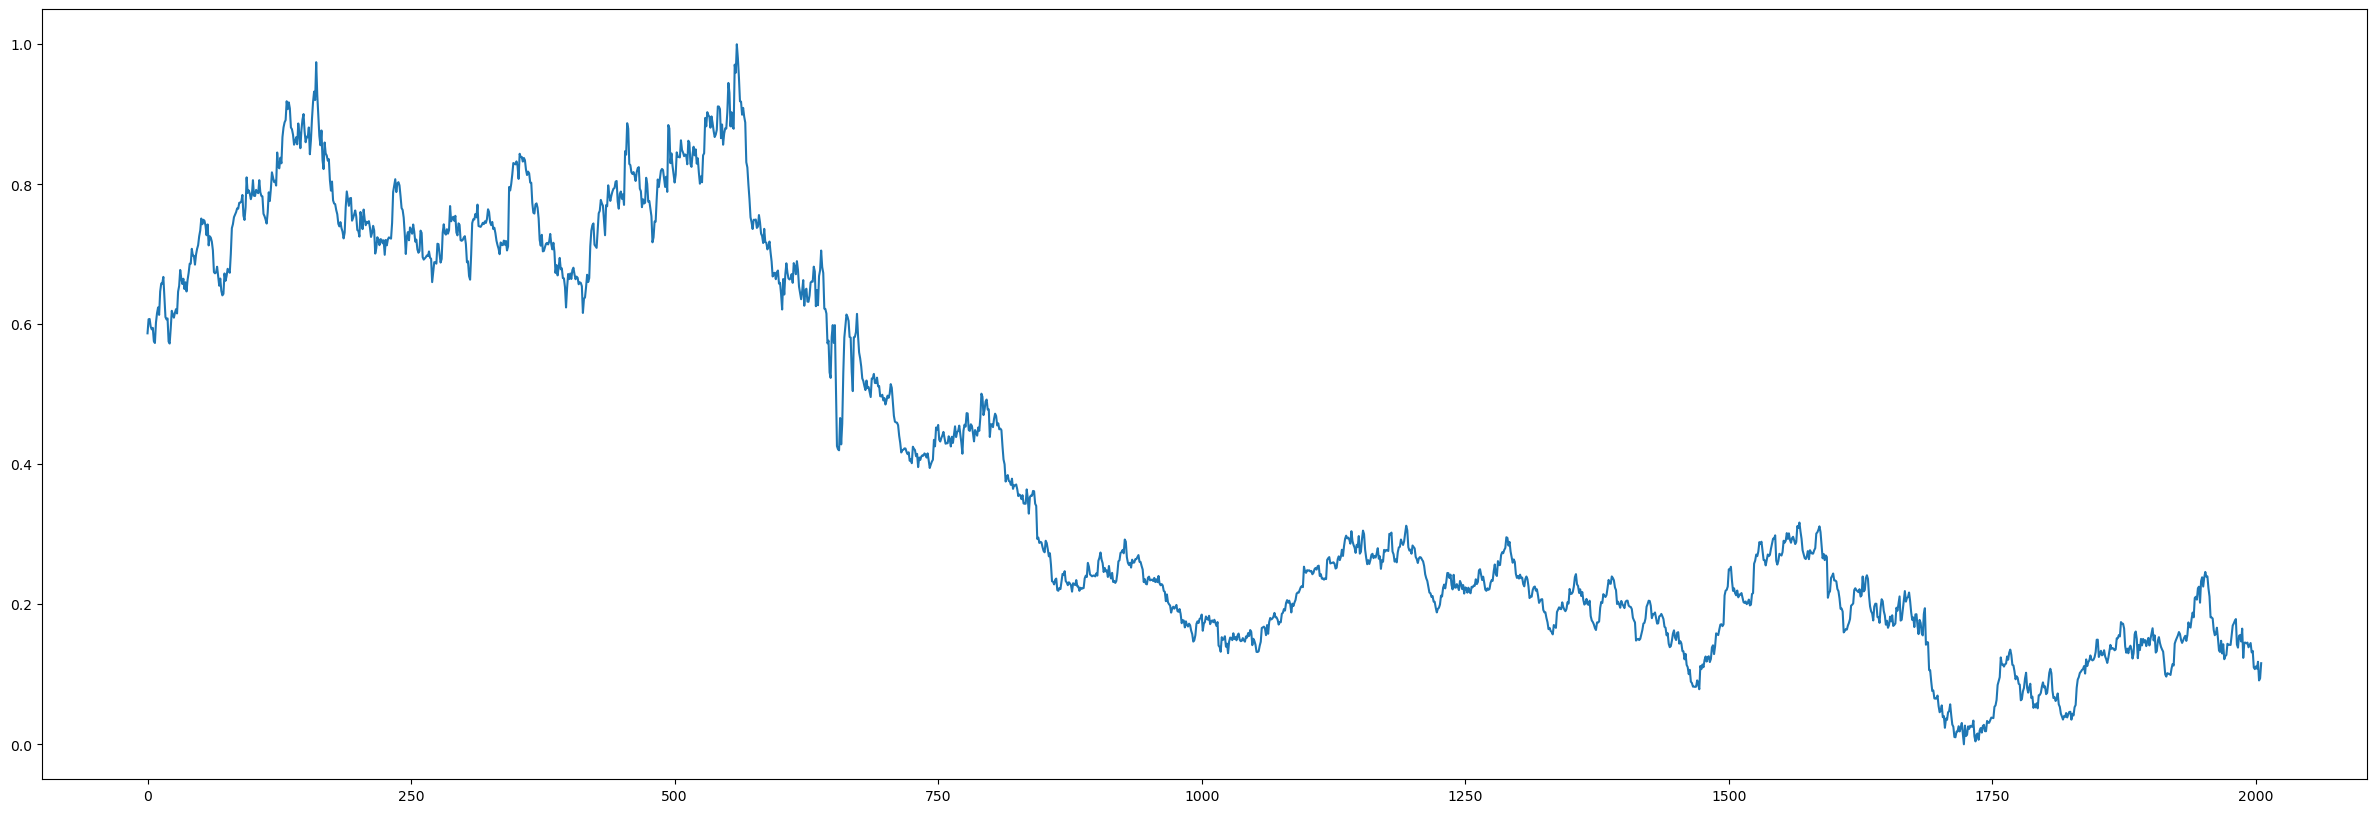

In [25]:
plt.figure(figsize=(30,10))
plt.plot(y_train)

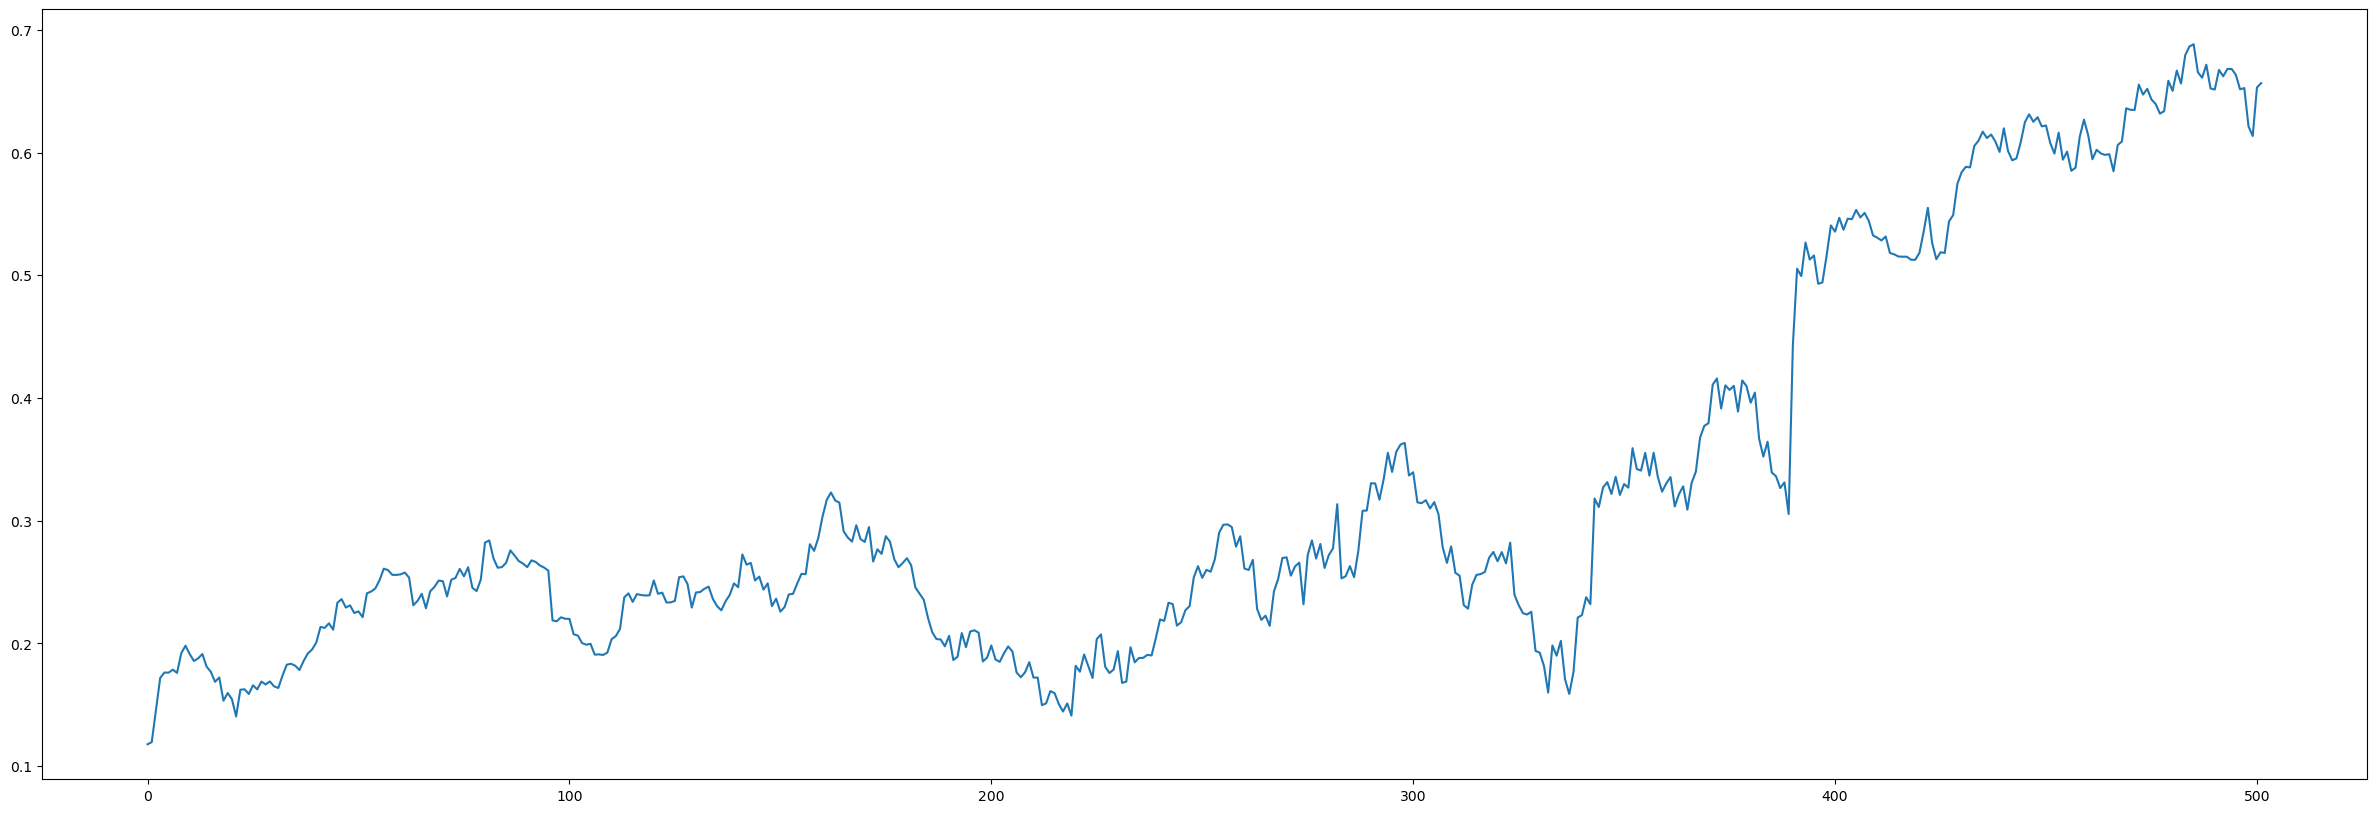

In [26]:
plt.figure(figsize=(30,10))
plt.plot(y_test)

In [27]:
## create ANN Model
model=Sequential()
model.add(Dense(40,input_dim=3,activation='relu'))
model.add(Dense(40,activation='relu'))
model.add(Dense(40,activation='relu'))
model.add(Dense(1,activation='linear'))
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 40)                160       
_________________________________________________________________
dense_1 (Dense)              (None, 40)                1640      
_________________________________________________________________
dense_2 (Dense)              (None, 40)                1640      
_________________________________________________________________
dense_3 (Dense)              (None, 1)                 41        
Total params: 3,481
Trainable params: 3,481
Non-trainable params: 0
_________________________________________________________________


In [28]:
## training procress
model.compile(optimizer='adam',loss='mean_squared_error')
trained=model.fit(X_train,y_train,epochs=100,batch_size=50,verbose=0,validation_split=0.25)

In [29]:
## model Evaluation
trained.history.keys()

dict_keys(['loss', 'val_loss'])

C:\Users\hp\AppData\Local\Temp\ipykernel_22824\3716280599.py:6: UserWarning: The label '_' of 's' starts with '_'. It is thus excluded from the legend.
  plt.legend('loss','val_loss')
C:\Users\hp\AppData\Local\Temp\ipykernel_22824\3716280599.py:6: UserWarning: Legend does not support handles for str instances.
A proxy artist may be used instead.
See: https://matplotlib.org/stable/tutorials/intermediate/legend_guide.html#controlling-the-legend-entries
  plt.legend('loss','val_loss')


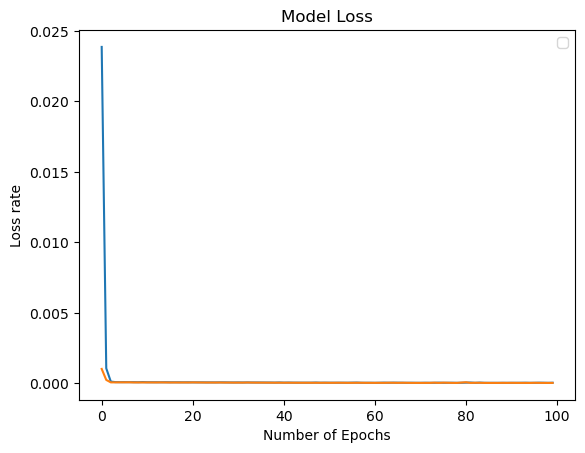

In [31]:
plt.plot(trained.history['loss'])
plt.plot(trained.history['val_loss'])
plt.title('Model Loss')
plt.xlabel('Number of Epochs')
plt.ylabel('Loss rate')
plt.legend('loss','val_loss')

In [32]:
y_pred=model.predict(X_test)

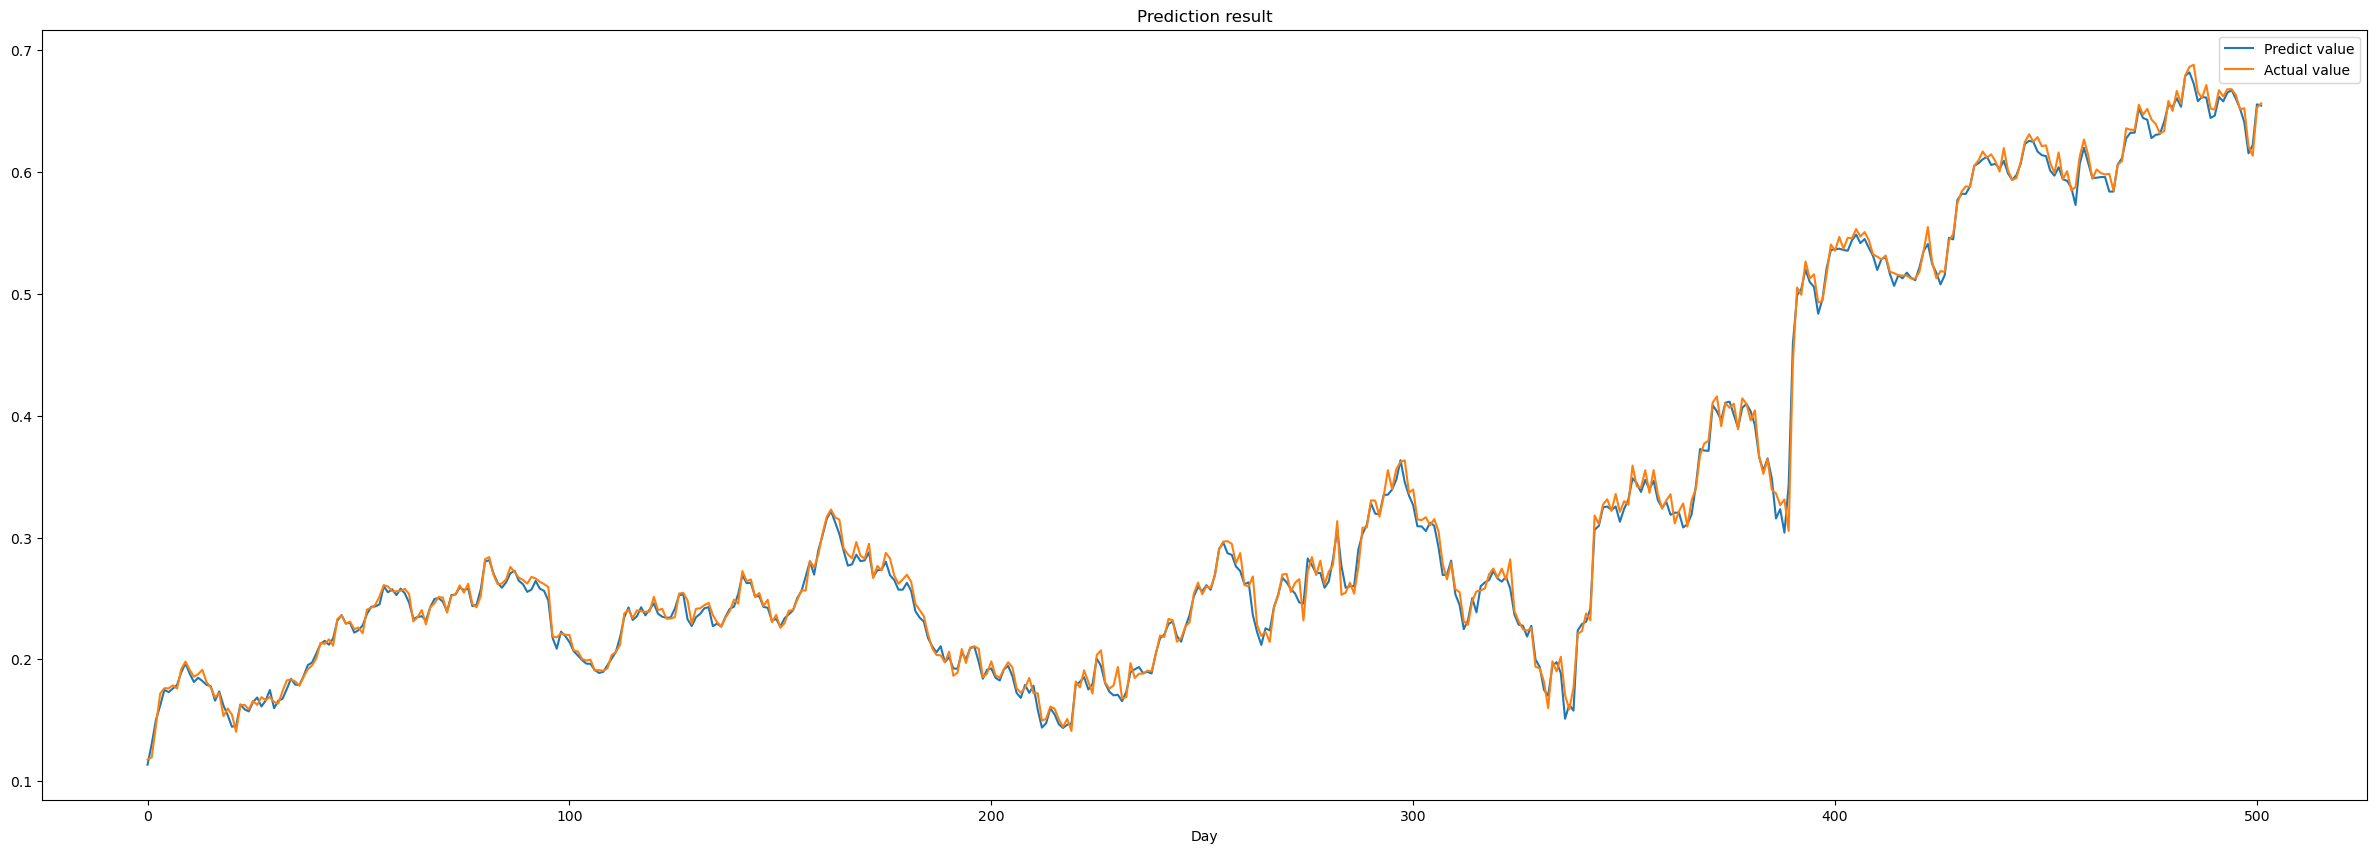

In [34]:
plt.figure(figsize=(30,10))
plt.plot(y_pred, label = 'Predict value')
plt.plot(y_test, label = 'Actual value')
plt.title('Prediction result')
plt.xlabel('Day')
plt.legend()